In [1]:
!git clone https://github.com/Prakash-Nagamani/track

Cloning into 'track'...
remote: Enumerating objects: 38446, done.
remote: Total 38446 (delta 0), reused 0 (delta 0), pack-reused 38446
Receiving objects: 100% (38446/38446), 571.14 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (38433/38433), done.


In [2]:
!ls track

driving_log.csv  IMG  README.md


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings
plt.rcParams['figure.figsize'] = [20,12]
warnings.filterwarnings("ignore")

In [4]:
dir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(dir,'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\prakash\simulator-windows-64\IMG\center_2023_03_20_12_45_36_253.jpg,D:\prakash\simulator-windows-64\IMG\left_2023_03_20_12_45_36_253.jpg,D:\prakash\simulator-windows-64\IMG\right_2023_03_20_12_45_36_253.jpg,0.0,0.0,0.0,1.147302
1,D:\prakash\simulator-windows-64\IMG\center_2023_03_20_12_45_36_365.jpg,D:\prakash\simulator-windows-64\IMG\left_2023_03_20_12_45_36_365.jpg,D:\prakash\simulator-windows-64\IMG\right_2023_03_20_12_45_36_365.jpg,0.0,0.0,0.0,1.133375
2,D:\prakash\simulator-windows-64\IMG\center_2023_03_20_12_45_36_481.jpg,D:\prakash\simulator-windows-64\IMG\left_2023_03_20_12_45_36_481.jpg,D:\prakash\simulator-windows-64\IMG\right_2023_03_20_12_45_36_481.jpg,0.0,0.0,0.0,1.119626
3,D:\prakash\simulator-windows-64\IMG\center_2023_03_20_12_45_36_597.jpg,D:\prakash\simulator-windows-64\IMG\left_2023_03_20_12_45_36_597.jpg,D:\prakash\simulator-windows-64\IMG\right_2023_03_20_12_45_36_597.jpg,0.0,0.0,0.0,1.108303
4,D:\prakash\simulator-windows-64\IMG\center_2023_03_20_12_45_36_700.jpg,D:\prakash\simulator-windows-64\IMG\left_2023_03_20_12_45_36_700.jpg,D:\prakash\simulator-windows-64\IMG\right_2023_03_20_12_45_36_700.jpg,0.0,0.0,0.0,1.094874


In [5]:
def pathleaf(path):
    head, tail = ntpath.split(path)
    return tail

data["center"] = data["center"].apply(pathleaf)
data["left"] = data["left"].apply(pathleaf)
data["right"] = data["right"].apply(pathleaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2023_03_20_12_45_36_253.jpg,left_2023_03_20_12_45_36_253.jpg,right_2023_03_20_12_45_36_253.jpg,0.0,0.0,0.0,1.147302
1,center_2023_03_20_12_45_36_365.jpg,left_2023_03_20_12_45_36_365.jpg,right_2023_03_20_12_45_36_365.jpg,0.0,0.0,0.0,1.133375
2,center_2023_03_20_12_45_36_481.jpg,left_2023_03_20_12_45_36_481.jpg,right_2023_03_20_12_45_36_481.jpg,0.0,0.0,0.0,1.119626
3,center_2023_03_20_12_45_36_597.jpg,left_2023_03_20_12_45_36_597.jpg,right_2023_03_20_12_45_36_597.jpg,0.0,0.0,0.0,1.108303
4,center_2023_03_20_12_45_36_700.jpg,left_2023_03_20_12_45_36_700.jpg,right_2023_03_20_12_45_36_700.jpg,0.0,0.0,0.0,1.094874


In [6]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data["steering"], num_bins)
print(bins)

[-1.         -0.92171454 -0.84342908 -0.76514362 -0.68685816 -0.6085727
 -0.53028724 -0.45200178 -0.37371632 -0.29543086 -0.2171454  -0.13885994
 -0.06057448  0.01771098  0.09599644  0.1742819   0.25256736  0.33085282
  0.40913828  0.48742374  0.5657092   0.64399466  0.72228012  0.80056558
  0.87885104  0.9571365 ]


In [7]:
center = (bins[:-1] + bins[1:])*0.5
center

array([-0.96085727, -0.88257181, -0.80428635, -0.72600089, -0.64771543,
       -0.56942997, -0.49114451, -0.41285905, -0.33457359, -0.25628813,
       -0.17800267, -0.09971721, -0.02143175,  0.05685371,  0.13513917,
        0.21342463,  0.29171009,  0.36999555,  0.44828101,  0.52656647,
        0.60485193,  0.68313739,  0.76142285,  0.83970831,  0.91799377])

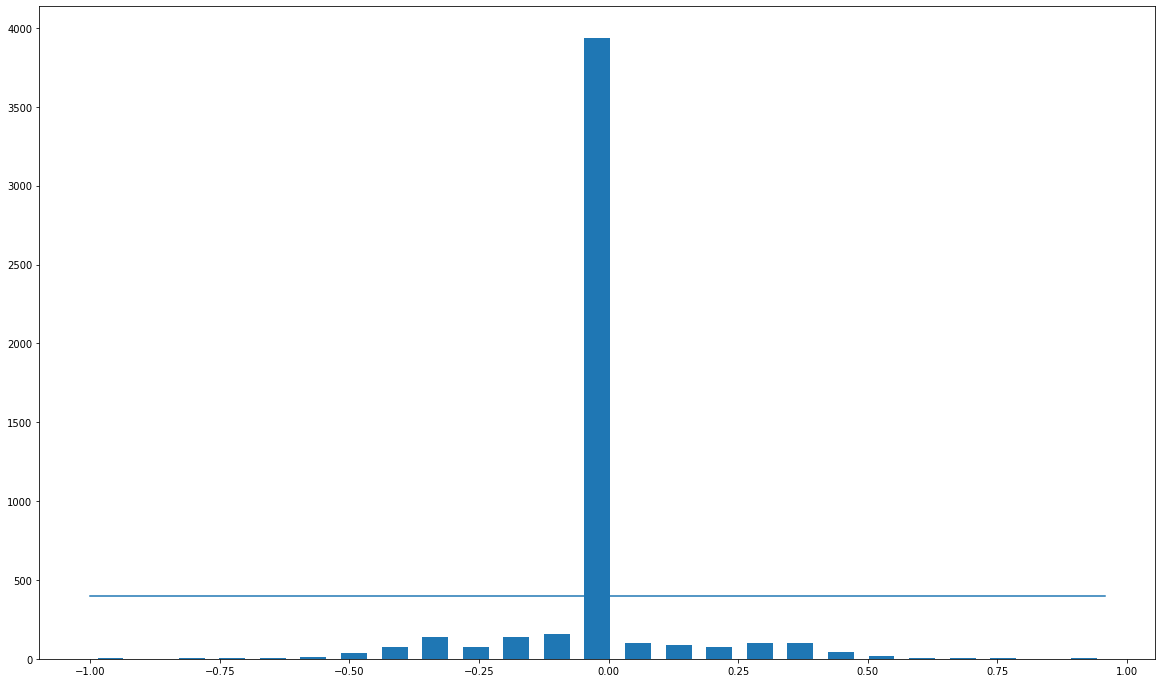

In [8]:
# center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot(
    (np.min(data["steering"]), np.max(data["steering"])),
    (samples_per_bin, samples_per_bin),
)

In [9]:
print("Total Data:", len(data))

Total Data: 5140


In [10]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data["steering"])):
        if data["steering"][i] >= bins[j] and data["steering"][i] <= bins[j + 1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
print("Removed:", len(remove_list))

Removed: 3540


In [11]:
data.drop(data.index[remove_list], inplace=True)

In [12]:
print("Remaining:", len(data))

Remaining: 1600


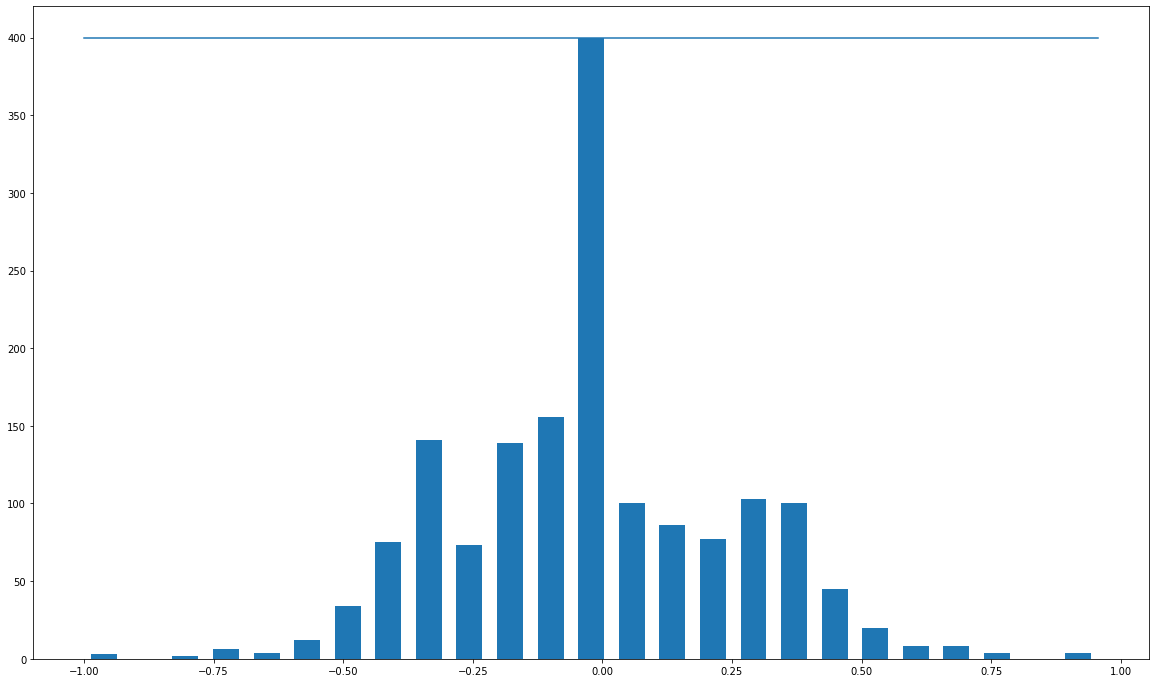

In [13]:
hist, _ = np.histogram(data["steering"], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(
    (np.min(data["steering"]), np.max(data["steering"])),
    (samples_per_bin, samples_per_bin),
)

In [14]:
print(data.iloc[1])

center      center_2023_03_20_12_45_37_254.jpg
left        left_2023_03_20_12_45_37_254.jpg  
right       right_2023_03_20_12_45_37_254.jpg 
steering   -0.328523                          
throttle    0.53644                           
reverse     0.0                               
speed       0.412279                          
Name: 9, dtype: object


In [15]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3]) + 0.15)
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3]) - 0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [16]:
image_paths, steerings = load_img_steering(dir + "/IMG", data)
X_train, X_valid, y_train, y_valid = train_test_split(
    image_paths, steerings, test_size=0.2, random_state=6
)
print("Training Samples: {}\nValid Samples: {}".format(len(X_train), len(X_valid)))

Training Samples: 3840
Valid Samples: 960


Text(0.5, 1.0, 'Validation set')

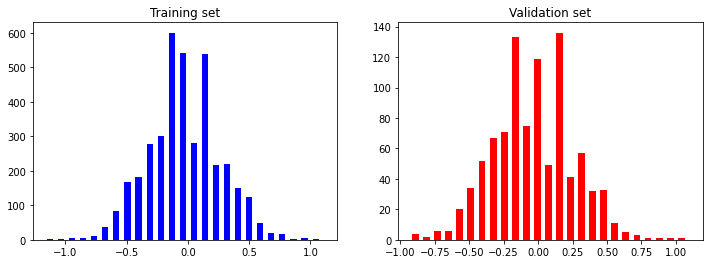

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color="blue")
axes[0].set_title("Training set")
axes[1].hist(y_valid, bins=num_bins, width=0.05, color="red")
axes[1].set_title("Validation set")

Text(0.5, 1.0, 'Zoomed Image')

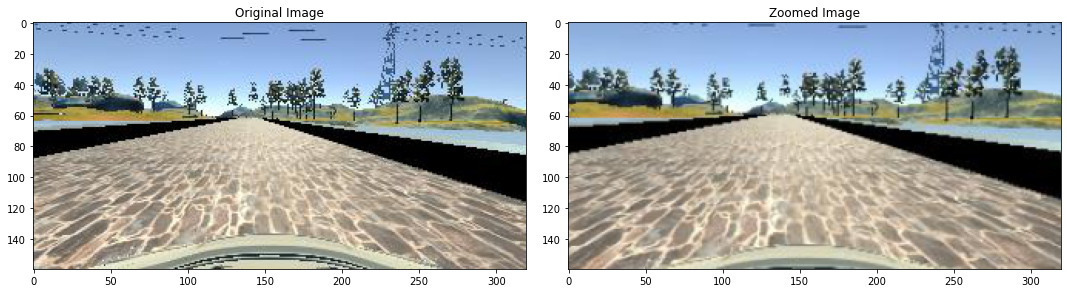

In [18]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed Image")

Text(0.5, 1.0, 'Panned Image')

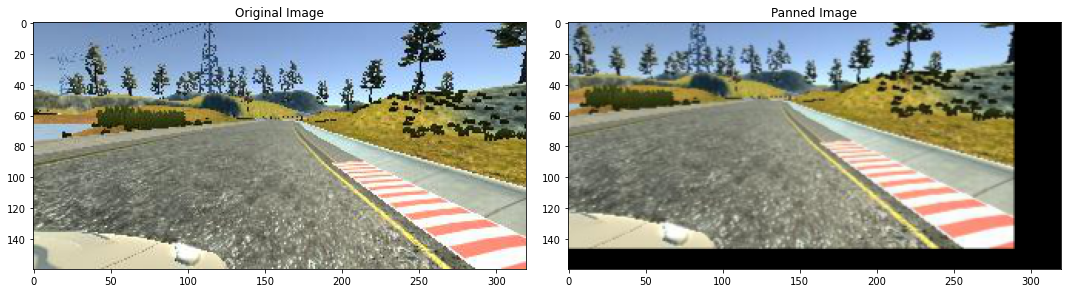

In [19]:
def pan(image):
    pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")

Text(0.5, 1.0, 'Brightness altered image ')

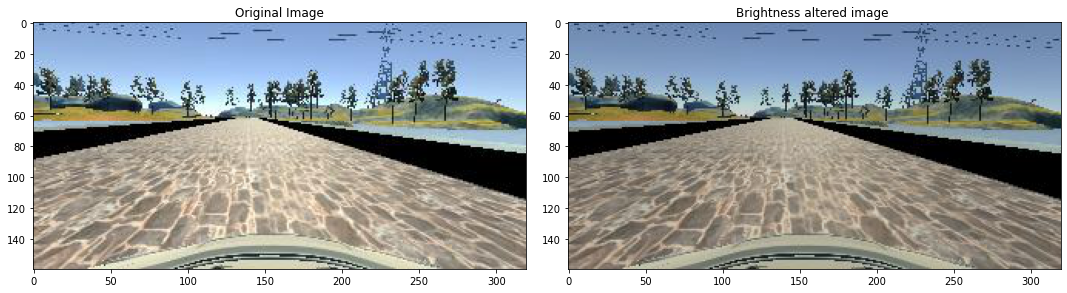

In [20]:
def random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(brightness_altered_image)
axs[1].set_title("Brightness altered image ")

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.1627659')

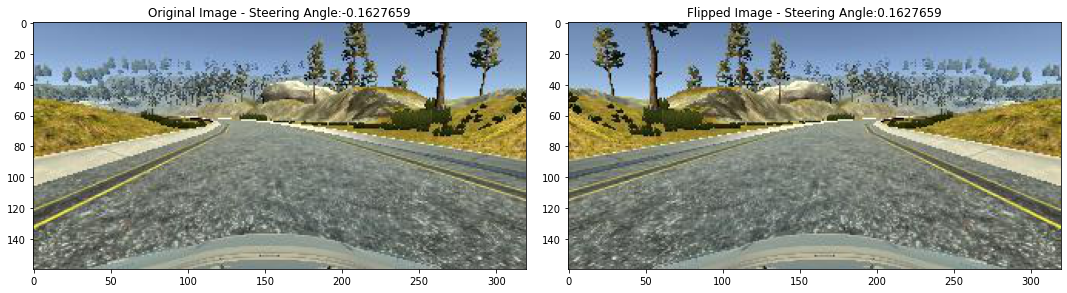

In [21]:
def random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle


random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image - " + "Steering Angle:" + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title("Flipped Image - " + "Steering Angle:" + str(flipped_steering_angle))

In [22]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = random_flip(image, steering_angle)
    return image, steering_angle


ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]

    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Preprocessed Image')

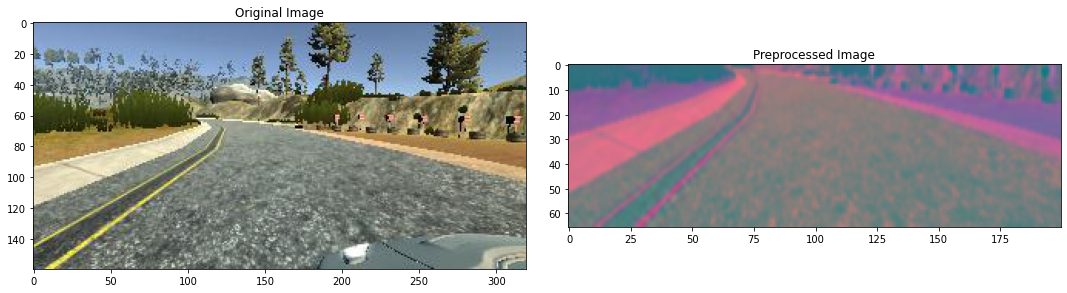

In [23]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

Text(0.5, 1.0, 'Preprocessed Image')

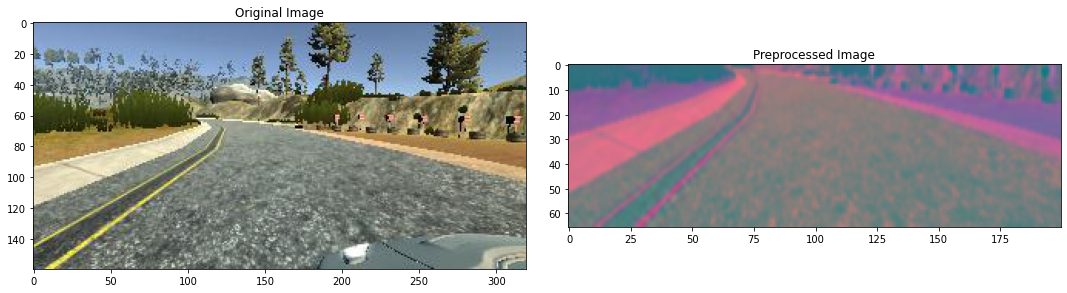

In [24]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [25]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering)) 

Text(0.5, 1.0, 'Validation Image')

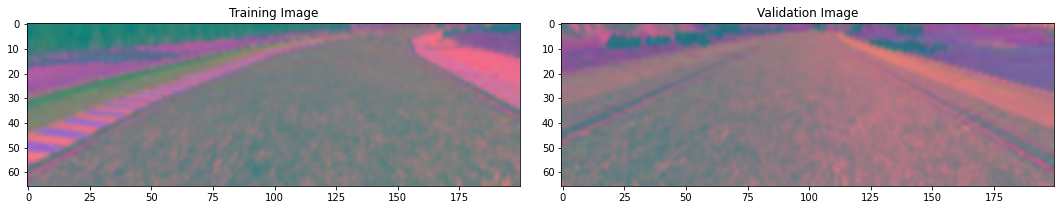

In [26]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [27]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [28]:
model = nvidiaModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [29]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 445s 1s/step - loss: 0.1156 - val_loss: 0.0585
Epoch 2/10
300/300 [==============================] - 491s 2s/step - loss: 0.0780 - val_loss: 0.0508
Epoch 3/10
300/300 [==============================] - 497s 2s/step - loss: 0.0739 - val_loss: 0.0514
Epoch 4/10
300/300 [==============================] - 503s 2s/step - loss: 0.0709 - val_loss: 0.0496
Epoch 5/10
300/300 [==============================] - 492s 2s/step - loss: 0.0692 - val_loss: 0.0523
Epoch 6/10
300/300 [==============================] - 487s 2s/step - loss: 0.0681 - val_loss: 0.0486
Epoch 7/10
300/300 [==============================] - 484s 2s/step - loss: 0.0678 - val_loss: 0.0465
Epoch 8/10
300/300 [==============================] - 489s 2s/step - loss: 0.0669 - val_loss: 0.0470
Epoch 9/10
300/300 [==============================] - 497s 2s/step - loss: 0.0658 - val_loss: 0.0450
Epoch 10/10
300/300 [==============================] - 505s 2s/step - loss: 0.0645 - val_lo

Text(0.5, 0, 'Epoch')

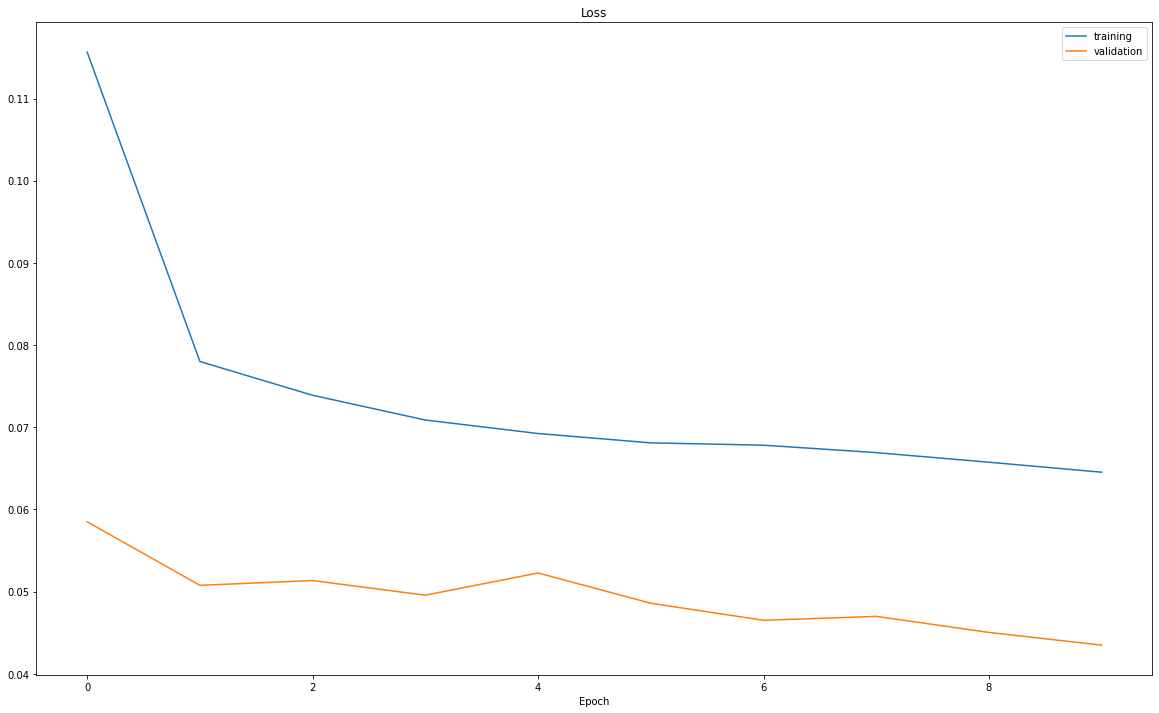

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')

plt.xlabel('Epoch')

In [31]:
model.save('model.h5')